In [29]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np



In [30]:
path='./housing.csv'


In [31]:
house_df=pd.read_csv(path)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [33]:
result_1=house_df['total_rooms']/house_df['households']
house_df['avg_rooms_per_household']=result_1
result=house_df['total_bedrooms']/house_df['households']
house_df['avg_bedrooms_per_household']=result

house_df['avg_bedrooms_per_household']

0        1.023810
1        0.971880
2        1.073446
3        1.073059
4        1.081081
           ...   
20635    1.133333
20636    1.315789
20637    1.120092
20638    1.171920
20639    1.162264
Name: avg_bedrooms_per_household, Length: 20640, dtype: float64

In [34]:
new_house_df=house_df.drop(['total_rooms','total_bedrooms'],axis=1)

In [35]:
new_house_df.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081


In [36]:
new_house_df.dropna()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920


In [37]:
# Fill missing values with the mode
mode_value = new_house_df['avg_bedrooms_per_household'].mode()[0]
new_house_df['avg_bedrooms_per_household'].fillna(mode_value, inplace=True)

In [38]:
# scale the median_house_value with inflation value 1.69
new_house_df['median_house_value']=new_house_df['median_house_value']*1.69

In [39]:
new_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   population                  20640 non-null  float64
 4   households                  20640 non-null  float64
 5   median_income               20640 non-null  float64
 6   median_house_value          20640 non-null  float64
 7   ocean_proximity             20640 non-null  object 
 8   avg_rooms_per_household     20640 non-null  float64
 9   avg_bedrooms_per_household  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
new_house_df.head()

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household,avg_bedrooms_per_household
0,-122.23,37.88,41.0,322.0,126.0,8.3252,764894.0,NEAR BAY,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,605865.0,NEAR BAY,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,595049.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,576797.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,578318.0,NEAR BAY,6.281853,1.081081


In [41]:
new_house_df.to_csv('new_house_data.csv')

Text(0.5, 1.0, 'California Median House Value Per Median Income')

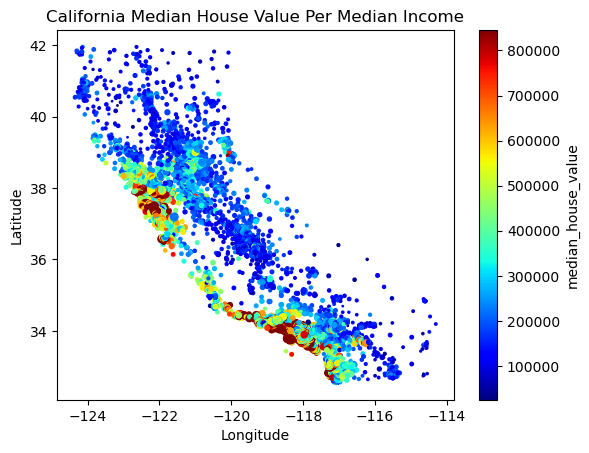

In [42]:
new_house_df.plot(kind='scatter',
                  x='longitude',
                     y='latitude',
                     c='median_house_value',
                     s=new_house_df['median_income']*2,
                     colormap='jet')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Median House Value Per Median Income')

In [43]:
# Separate the features from the target.
X=new_house_df.drop(columns=['median_house_value'])
y=new_house_df['median_house_value']
y.shape
y


0        764894.0
1        605865.0
2        595049.0
3        576797.0
4        578318.0
           ...   
20635    131989.0
20636    130299.0
20637    155987.0
20638    143143.0
20639    151086.0
Name: median_house_value, Length: 20640, dtype: float64

In [44]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X,dtype=int)

In [45]:
X.head()

,longitude,latitude,housing_median_age,population,households,median_income,avg_rooms_per_household,avg_bedrooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,322.0,126.0,8.3252,6.984127,1.023810,0,0,0,1,0
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,6.238137,0.971880,0,0,0,1,0
2,-122.24,37.85,52.0,496.0,177.0,7.2574,8.288136,1.073446,0,0,0,1,0
3,-122.25,37.85,52.0,558.0,219.0,5.6431,5.817352,1.073059,0,0,0,1,0
4,-122.25,37.85,52.0,565.0,259.0,3.8462,6.281853,1.081081,0,0,0,1,0


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)



In [47]:
# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [48]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)


In [49]:
y_pred

array([ 84163.69   , 117104.156  , 789523.59356, ..., 841345.83806,
       119581.02   , 296954.632  ])

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 53741.2370378731
Mean Squared Error: 6874096807.563106
R-squared Score: 0.8163312058199762


In [51]:
# Get the feature importance array
importances = rf_model.feature_importances_
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.4847887031393972, 'median_income'),
 (0.1415185405631427, 'ocean_proximity_INLAND'),
 (0.09865227771703959, 'longitude'),
 (0.0904251051109586, 'latitude'),
 (0.04938565246449712, 'housing_median_age'),
 (0.03666502504004484, 'avg_rooms_per_household'),
 (0.03382670917785597, 'avg_bedrooms_per_household'),
 (0.028584358058276967, 'households'),
 (0.025934289926222605, 'population'),
 (0.006774992161935781, 'ocean_proximity_NEAR OCEAN')]

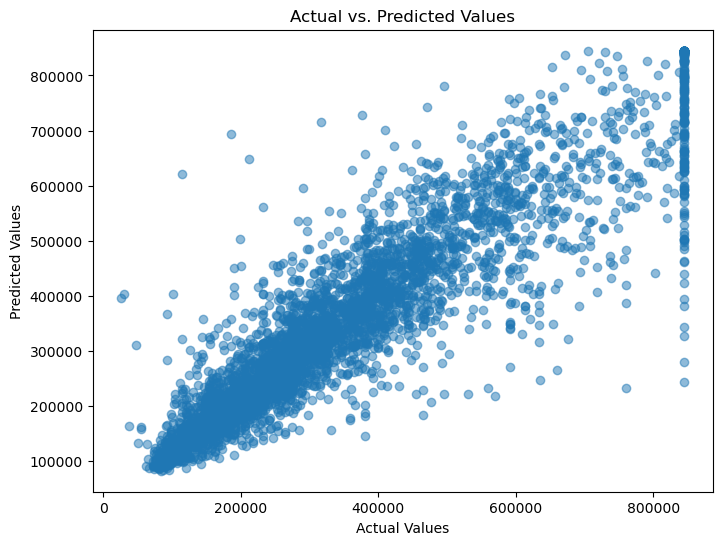

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [53]:
# testing with sample data
sample=pd.read_csv('./sample.csv')
sample_1=scaler.transform(sample)


In [54]:
value=rf_model.predict(sample_1)
print('House value for the provided data is:',value[0])

House value for the provided data is: 706527.0581199992


In [56]:
import pickle

with open('rf_model.pkl', 'wb') as f: 
    pickle.dump(rf_model, f)